In [1]:
#Project 2: Retail Data Analytics
#By Preethi Susan Abraham and Alvin Varghese

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Background of Dataset

The three datasets i.e stores, sales and features are from Kaggle. The explanation for each dataset is as follows:

1. stores:
This dataset contains the store number, store size and store type of 45 stores

2. sales:
This dataset contains information about the store, department, date, weekly sales and whether a particular day was a holiday. The dates are from 2010-02-05 to 2012-11-01

3. features:
This dataset contains additional information like:
    * Store - the store number
    * Date - the week
    * Temperature - average temperature in the region
    * Fuel_Price - cost of fuel in the region
    *MarkDown1-5 - anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
    * CPI - the consumer price index
    * Unemployment - the unemployment rate
    * IsHoliday - whether the week is a special holiday week

In [2]:
#Read the datasets
stores=pd.read_csv("C:/Users/Preethi Abraham/Desktop/Brandeis Studies/Big Data 2/datasets/notebooks/Assignment 3/Retail Data Analytics/stores data-set.csv")
sales=pd.read_csv("C:/Users/Preethi Abraham/Desktop/Brandeis Studies/Big Data 2/datasets/notebooks/Assignment 3/Retail Data Analytics/sales data-set.csv")
features=pd.read_csv("C:/Users/Preethi Abraham/Desktop/Brandeis Studies/Big Data 2/datasets/notebooks/Assignment 3/Retail Data Analytics/Features data set.csv")

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


We need to merge all datasets into a single dataset

In [6]:
features = features.merge(stores, on = 'Store')
data = features.merge(sales, on = ['Store','Date','IsHoliday'])

In [7]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [8]:
data.Date = pd.to_datetime(data.Date)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

# Exploratory Data Analysis

In [10]:
#summary statistics
data.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,44.260317,15981.258123
std,12.785297,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,99.000000,693099.360000


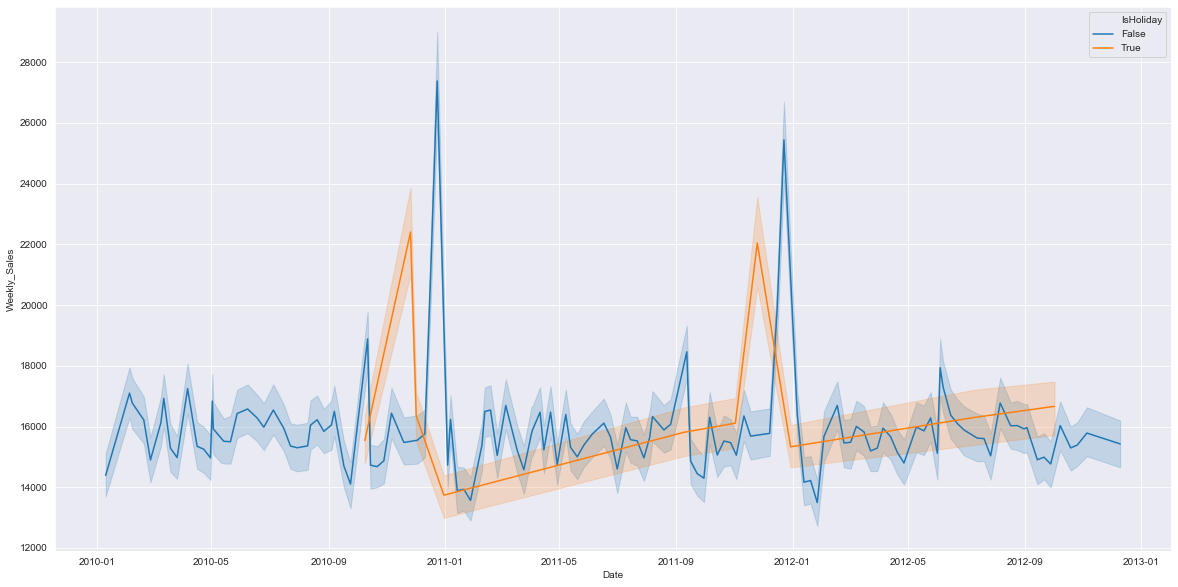

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize = (20,10))
sns.lineplot(data=data, x='Date', y='Weekly_Sales', hue='IsHoliday')

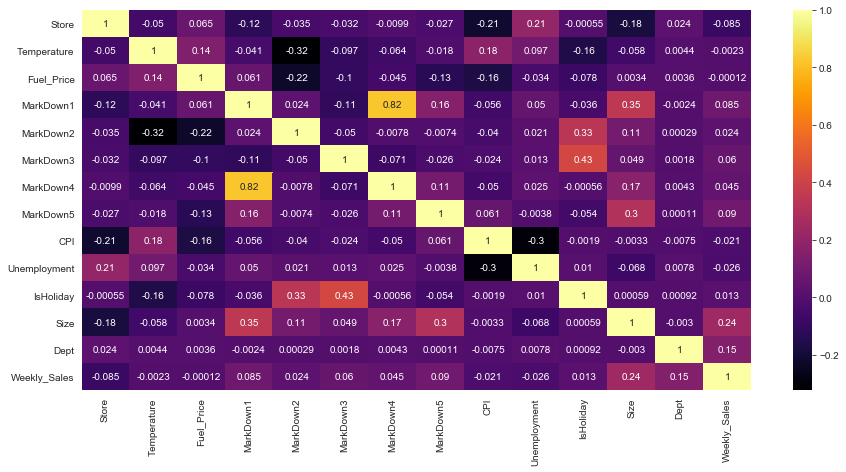

In [12]:
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(),cmap="inferno",annot = True)

In [13]:
data["year"]= pd. DatetimeIndex(data['Date']). year

In [14]:
data["month"]= pd. DatetimeIndex(data['Date']). month

In [15]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year,month
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2010,5
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,2010,5
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,2010,5
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,2010,5
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,2010,5


In [16]:
data['year'].unique()

array([2010, 2011, 2012], dtype=int64)

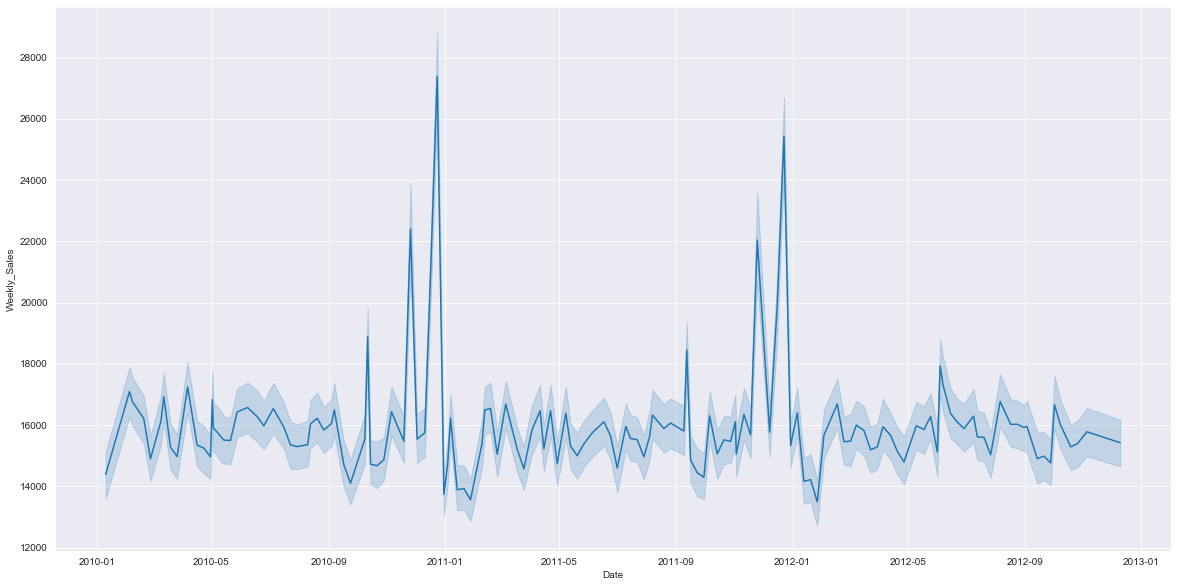

In [17]:
plt.figure(figsize = (20,10))
sns.lineplot(data=data, x='Date', y='Weekly_Sales')

In [18]:
df_2010=data[data["year"] == 2010]
df_2011=data[data["year"] == 2011]
df_2012=data[data["year"] == 2012]

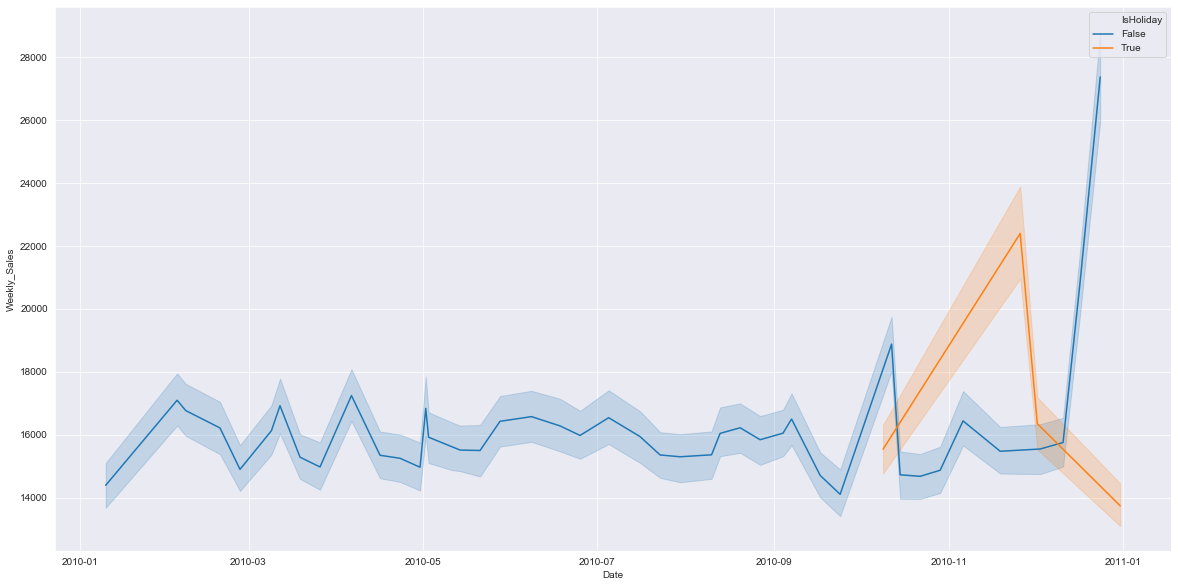

In [19]:
plt.figure(figsize = (20,10))
sns.lineplot(data=df_2010, x='Date', y='Weekly_Sales', hue='IsHoliday')
#During October to December of 2010, there seems to be a sudden increase in sales.

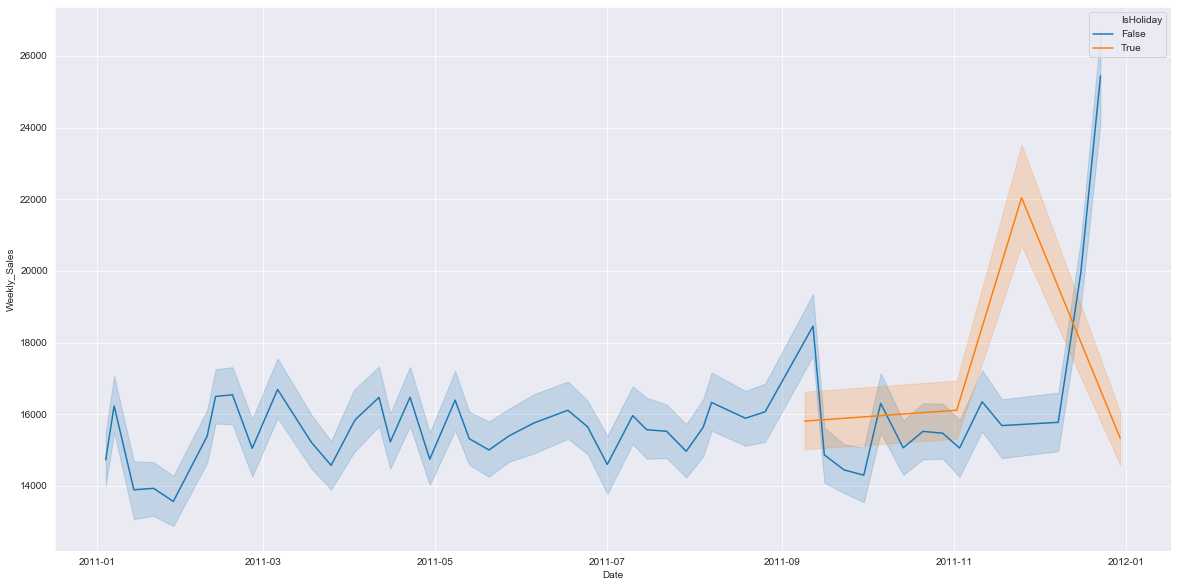

In [20]:
plt.figure(figsize = (20,10))
sns.lineplot(data=df_2011, x='Date', y='Weekly_Sales', hue='IsHoliday')

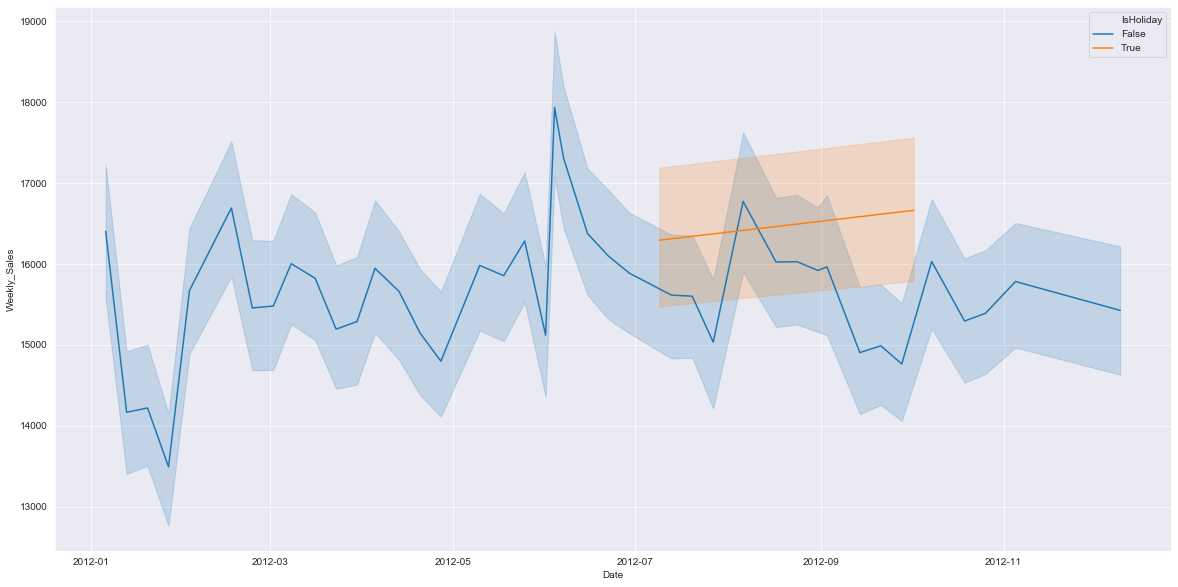

In [21]:
plt.figure(figsize = (20,10))
sns.lineplot(data=df_2012, x='Date', y='Weekly_Sales', hue='IsHoliday')

<Figure size 1440x720 with 0 Axes>

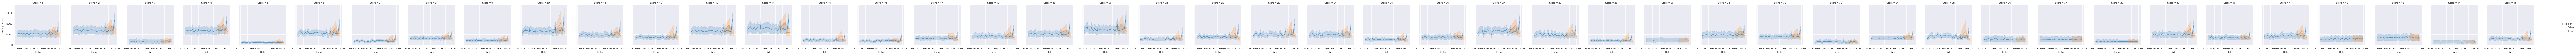

In [22]:
plt.figure(figsize = (20,10))
g = sns.FacetGrid(df_2010, col="Store", hue="IsHoliday")
g.map(sns.lineplot, "Date", "Weekly_Sales", alpha=.7)
g.add_legend()

In [23]:
df_store = data.groupby('Store', as_index = False)\
    .agg({'Weekly_Sales':'mean'})\
    .sort_values('Weekly_Sales', ascending = False)
df_store.head() #Top 5 stores

,Store,Weekly_Sales
19,20,29508.301592
3,4,29161.210415
13,14,28784.851727
12,13,27355.136891
1,2,26898.070031


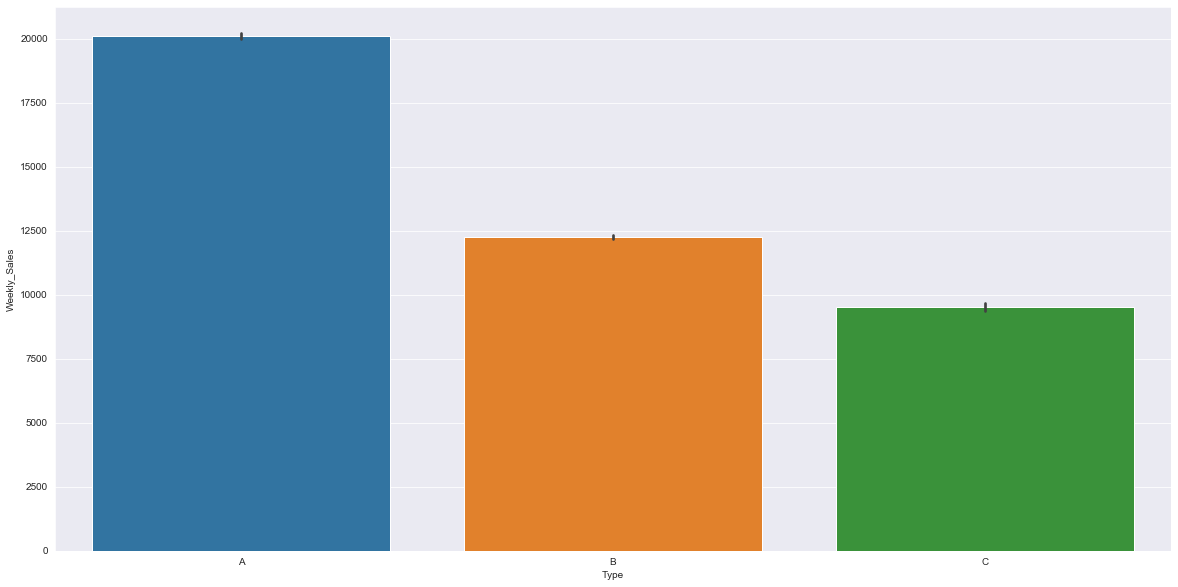

In [24]:
plt.figure(figsize = (20,10))
sns.barplot(data=data, x='Type', y='Weekly_Sales')

In [25]:
df_type = data.groupby('Type', as_index = False)\
    .agg({'Weekly_Sales':'mean'})\
    .sort_values('Weekly_Sales', ascending = False)
df_type

,Type,Weekly_Sales
0,A,20099.568043
1,B,12237.075977
2,C,9519.532538


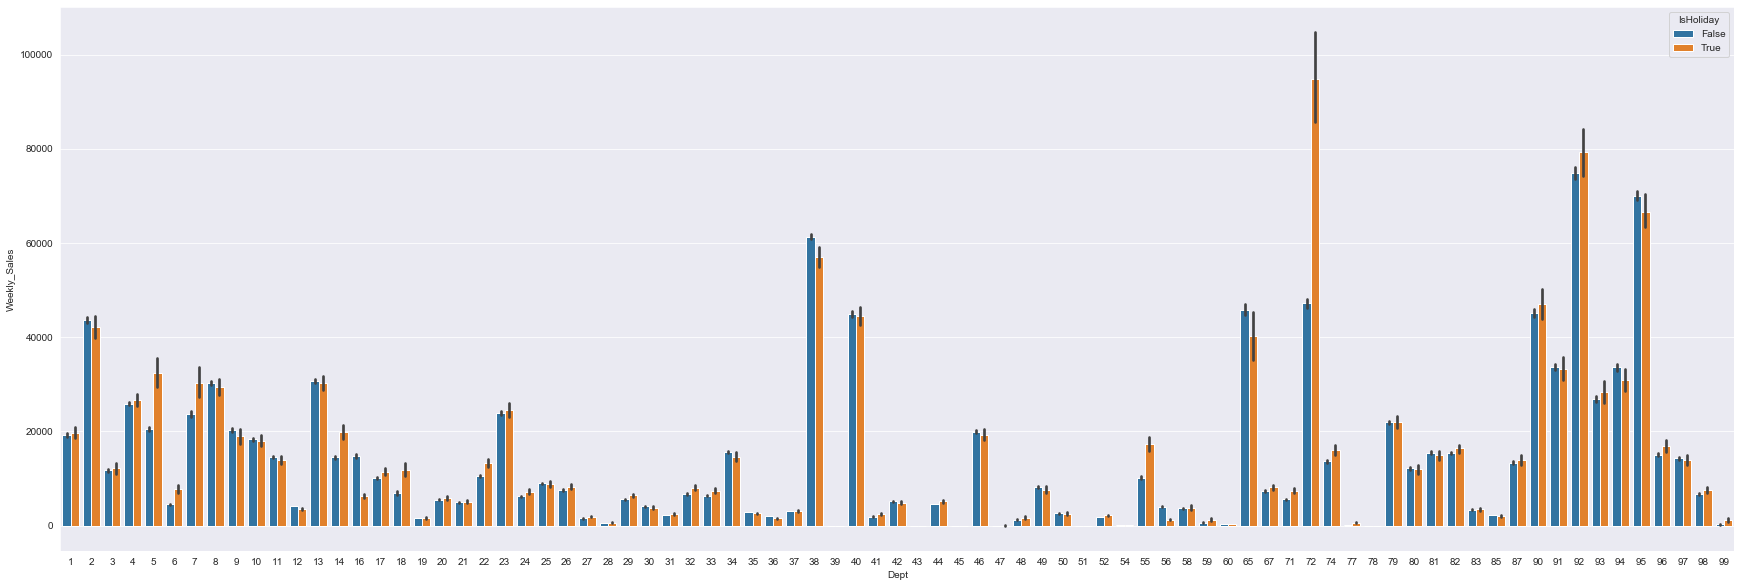

In [26]:
plt.figure(figsize = (30,10))
sns.barplot(data=data, x='Dept', y='Weekly_Sales', hue='IsHoliday')

In [27]:
df_dept = data.groupby('Dept', as_index = False)\
    .agg({'Weekly_Sales':'mean'})\
    .sort_values('Weekly_Sales', ascending = False)
df_dept.head() #top 5 departments

,Dept,Weekly_Sales
73,92,75204.870531
76,95,69824.423080
36,38,61090.619568
60,72,50566.515417
57,65,45441.706224


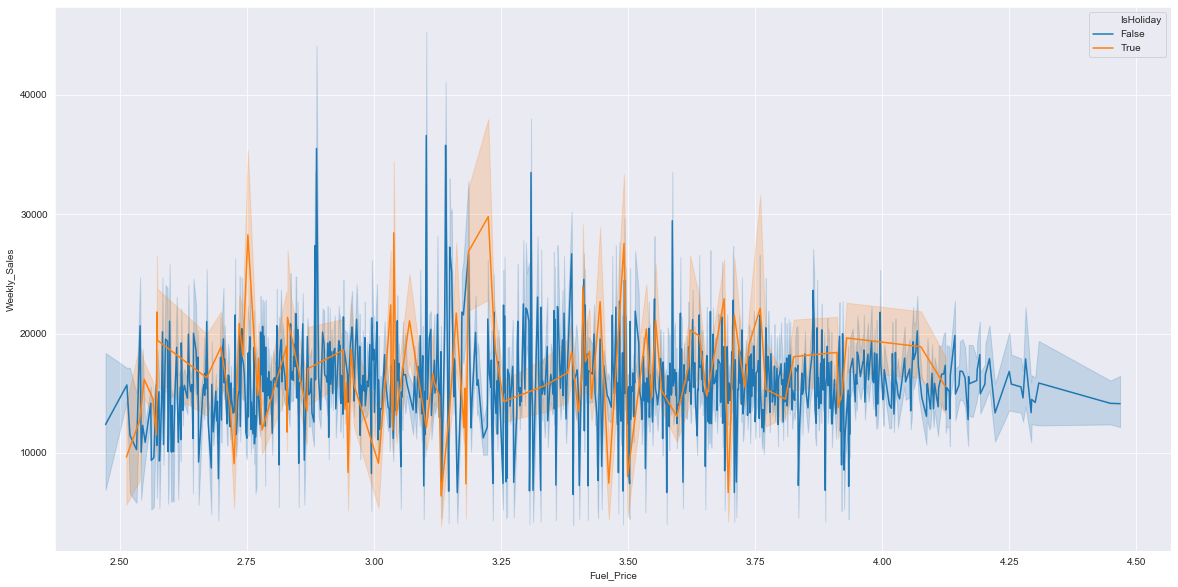

In [28]:
plt.figure(figsize = (20,10))
sns.lineplot(data=data, x='Fuel_Price', y='Weekly_Sales', hue='IsHoliday')

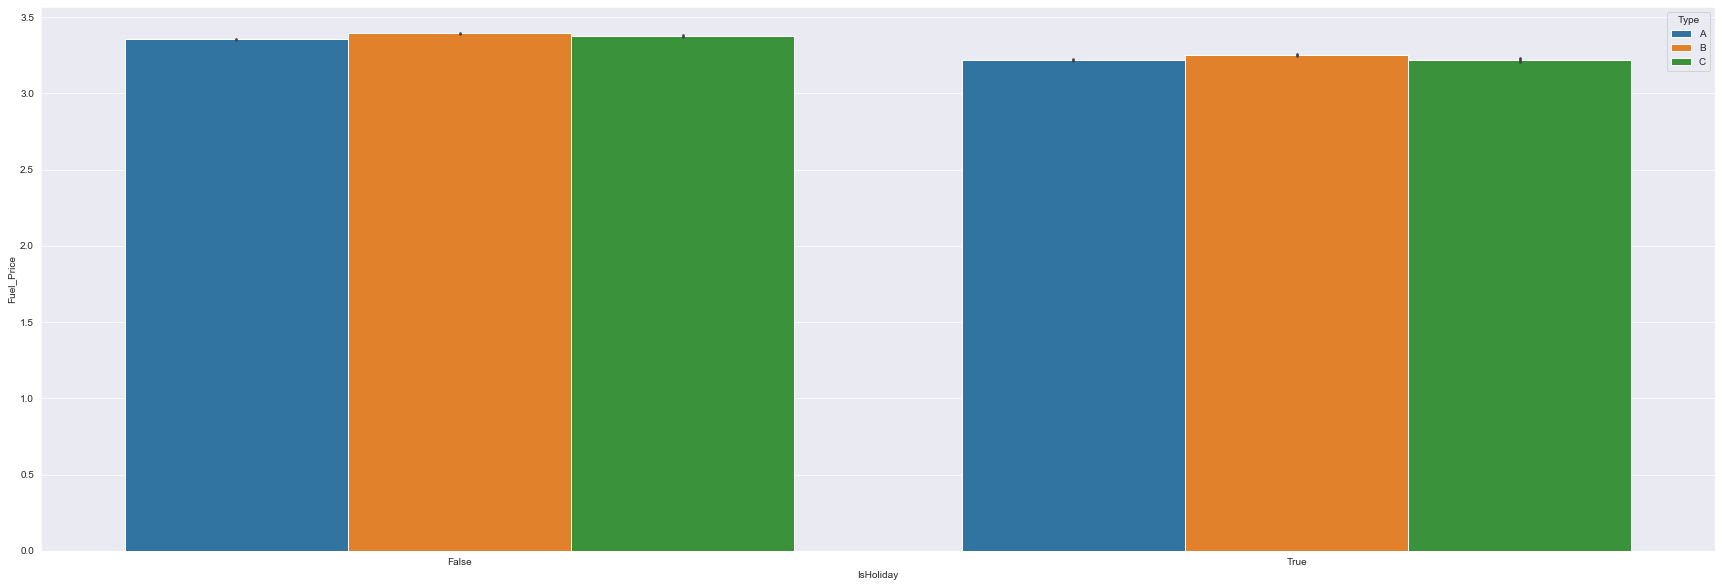

In [29]:
plt.figure(figsize = (30,10))
sns.barplot(data=data, x='IsHoliday', y='Fuel_Price', hue="Type")

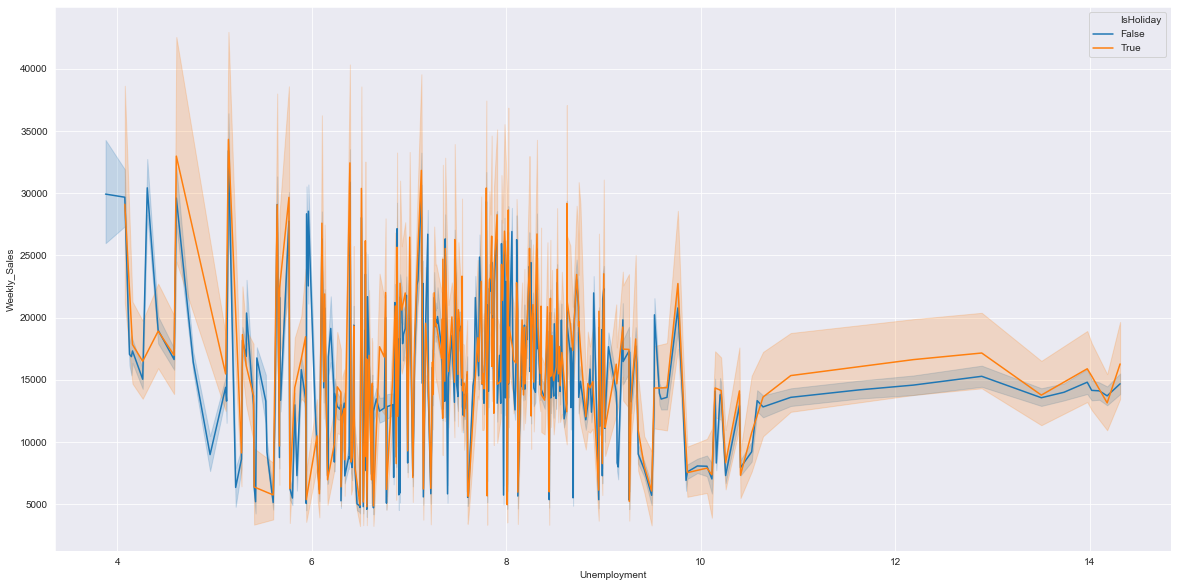

In [30]:
plt.figure(figsize = (20,10))
sns.lineplot(data=data, x='Unemployment', y='Weekly_Sales', hue="IsHoliday")

In [31]:
df_unemp = data.groupby('year', as_index = False)\
    .agg({'Unemployment':'mean'})\
    .sort_values('Unemployment', ascending = False)

df_unemp

,year,Unemployment
0,2010,8.446427
1,2011,8.036353
2,2012,7.332047


In [32]:
df_cpi = data.groupby('year', as_index = False)\
    .agg({'CPI':'mean'})\
    .sort_values('CPI', ascending = False)

df_cpi

,year,CPI
2,2012,175.061958
1,2011,171.181195
0,2010,167.727885


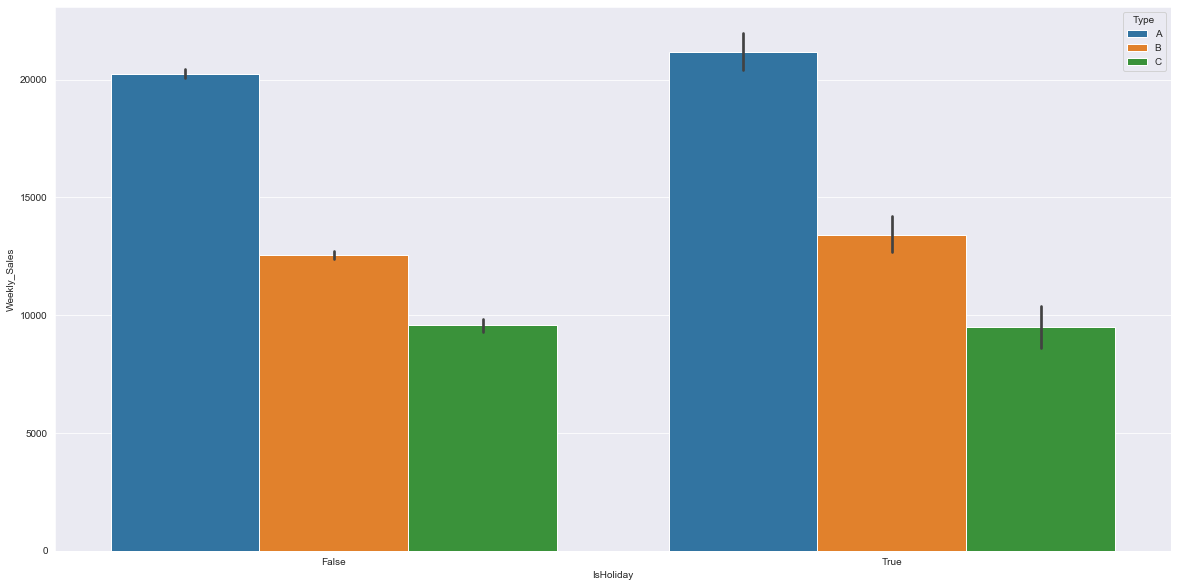

In [33]:
plt.figure(figsize = (20,10))
sns.barplot(data=df_2010, x='IsHoliday', y='Weekly_Sales', hue='Type')

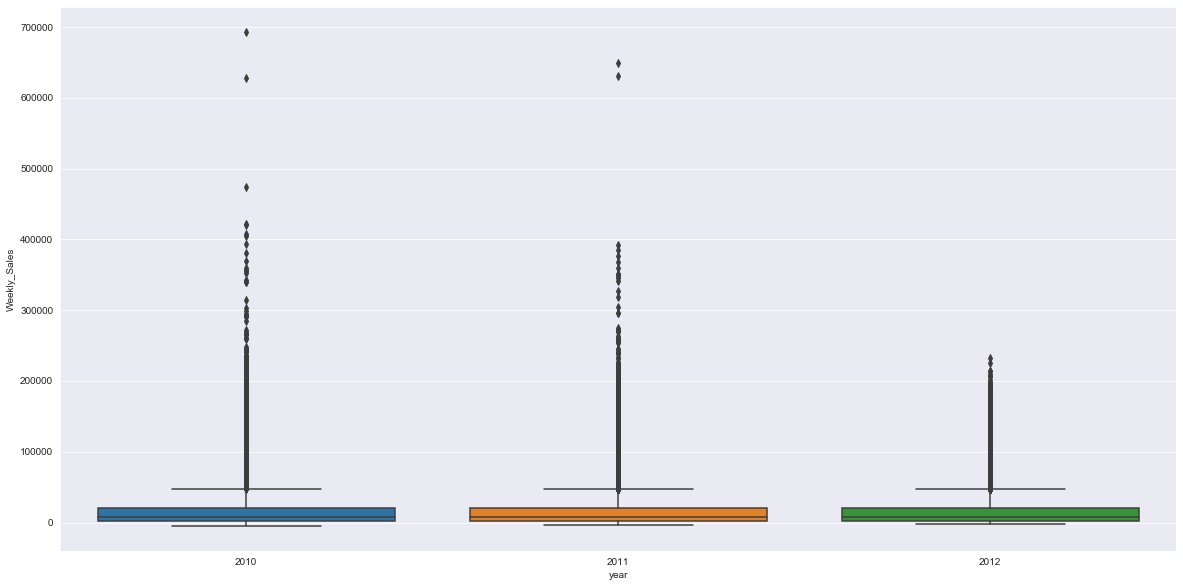

In [34]:
plt.figure(figsize = (20,10))
sns.boxplot(x='year', y='Weekly_Sales', data=data)

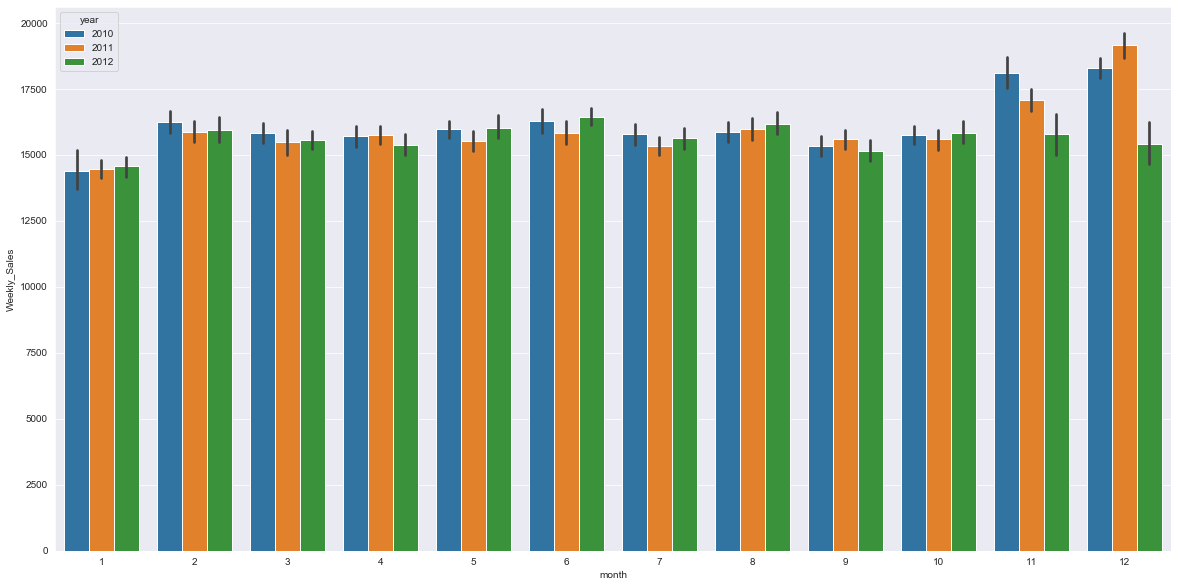

In [35]:
plt.figure(figsize = (20,10))
sns.barplot(x='month', y='Weekly_Sales', data=data, hue='year')

In [36]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year,month
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2010,5
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,2010,5
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,2010,5
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,2010,5
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,2010,5


In [37]:
data.corr()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,year,month
Store,1.000000,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.000548,-0.182881,0.024004,-0.085195,0.002997,0.000225
Temperature,-0.050097,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.155949,-0.058313,0.004437,-0.002312,0.065814,0.065847
Fuel_Price,0.065290,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,-0.078281,0.003361,0.003572,-0.000120,0.779633,-0.051950
MarkDown1,-0.119588,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,-0.035586,0.345673,-0.002426,0.085251,0.141332,-0.153350
MarkDown2,-0.035173,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.334818,0.108827,0.000290,0.024130,-0.222109,0.107188
MarkDown3,-0.031556,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.427960,0.048913,0.001784,0.060385,-0.319162,0.165016
MarkDown4,-0.009941,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,-0.000562,0.168196,0.004257,0.045414,0.126469,-0.175057
MarkDown5,-0.026634,-0.017544,-0.128065,0.160257,-0.007440,-0.026467,0.107792,1.000000,0.060630,-0.003843,-0.053719,0.304575,0.000109,0.090362,-0.128387,-0.023783
CPI,-0.211088,0.182112,-0.164210,-0.055558,-0.039534,-0.023590,-0.049628,0.060630,1.000000,-0.299953,-0.001944,-0.003314,-0.007477,-0.020921,0.074544,0.001749
Unemployment,0.208552,0.096730,-0.033853,0.050285,0.020940,0.012818,0.024963,-0.003843,-0.299953,1.000000,0.010460,-0.068238,0.007837,-0.025864,-0.237161,-0.001897


In [38]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year,month
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2010,5
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,2010,5
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,2010,5
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,2010,5
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,2010,5


# Performing Regression Analysis

In [39]:
#Removing the time series elements and performing regression on the other data
df=data.drop(columns=['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5', 'Date','year','month'])

In [40]:
df.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,42.31,2.572,211.096358,8.106,False,A,151315,1,24924.50
1,1,42.31,2.572,211.096358,8.106,False,A,151315,2,50605.27
2,1,42.31,2.572,211.096358,8.106,False,A,151315,3,13740.12
3,1,42.31,2.572,211.096358,8.106,False,A,151315,4,39954.04
4,1,42.31,2.572,211.096358,8.106,False,A,151315,5,32229.38


In [41]:
df.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,171.201947,7.960289,136727.915739,44.260317,15981.258123
std,12.785297,18.447931,0.458515,39.159276,1.863296,60980.583328,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,182.318780,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,212.416993,8.572000,202505.000000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,99.000000,693099.360000


In [42]:
df.groupby('Store', as_index = False)\
    .agg({'Weekly_Sales':'mean'})\
    .sort_values('Weekly_Sales', ascending = False).head(15)

#Store numbers 20, 4, 14, 13, 2 seem to be making the highest amount of weekly sales

,Store,Weekly_Sales
19,20,29508.301592
3,4,29161.210415
13,14,28784.851727
12,13,27355.136891
1,2,26898.070031
9,10,26332.303819
26,27,24826.984536
5,6,21913.243624
0,1,21710.543621
38,39,21000.763562


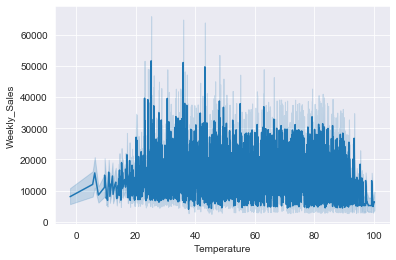

In [43]:
sns.lineplot(data=df, x='Temperature', y='Weekly_Sales')
#When temperature is between 25 to 45, more weekly sales occur

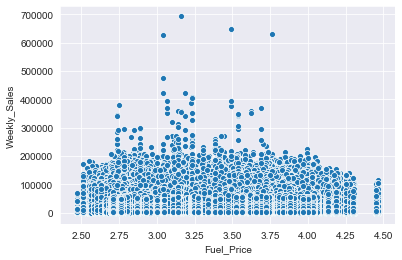

In [44]:
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales')
#When fuel price is between 2.75 to 3.75, more weekly sales seems to occur

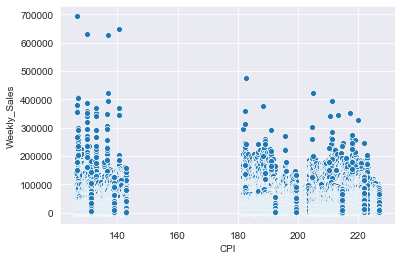

In [45]:
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales')
#when CPI is lower than 140 or between 180 and 220, weekly sales seems to occur more
#No sales occur when CPI lies between approx 145 to 170

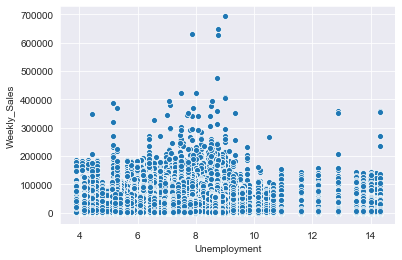

In [46]:
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales')
#Weekly sales is the most when unemployement values are between 6 to 10

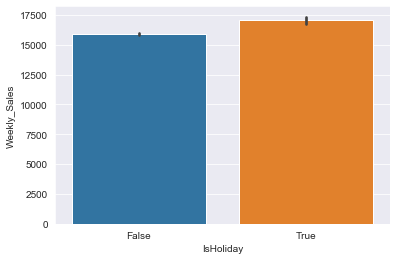

In [47]:
sns.barplot(data=df, x='IsHoliday', y='Weekly_Sales')
#Weekly sales are more during holidays

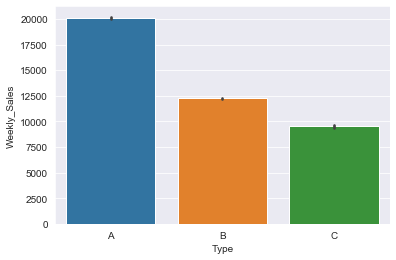

In [48]:
sns.barplot(data=df, x='Type', y='Weekly_Sales')
#Type A has the most amount of weekly sales

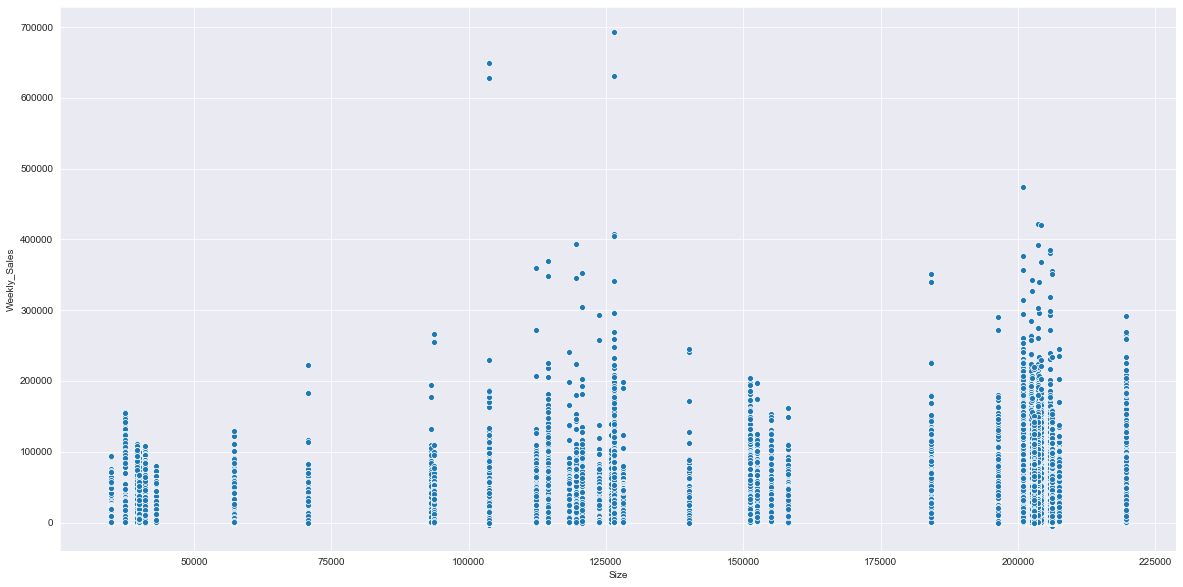

In [49]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=df, x='Size', y='Weekly_Sales')
#Stores with mid range size (approx 120000 to 130000) and large stores (200000 to 225000) have high weekly sales

In [50]:
df.groupby('Type', as_index = False)\
    .agg({'Size':'mean'})\
    .sort_values('Size', ascending = False).head(15)

,Type,Size
0,A,182231.285486
1,B,101818.735827
2,C,40535.725286


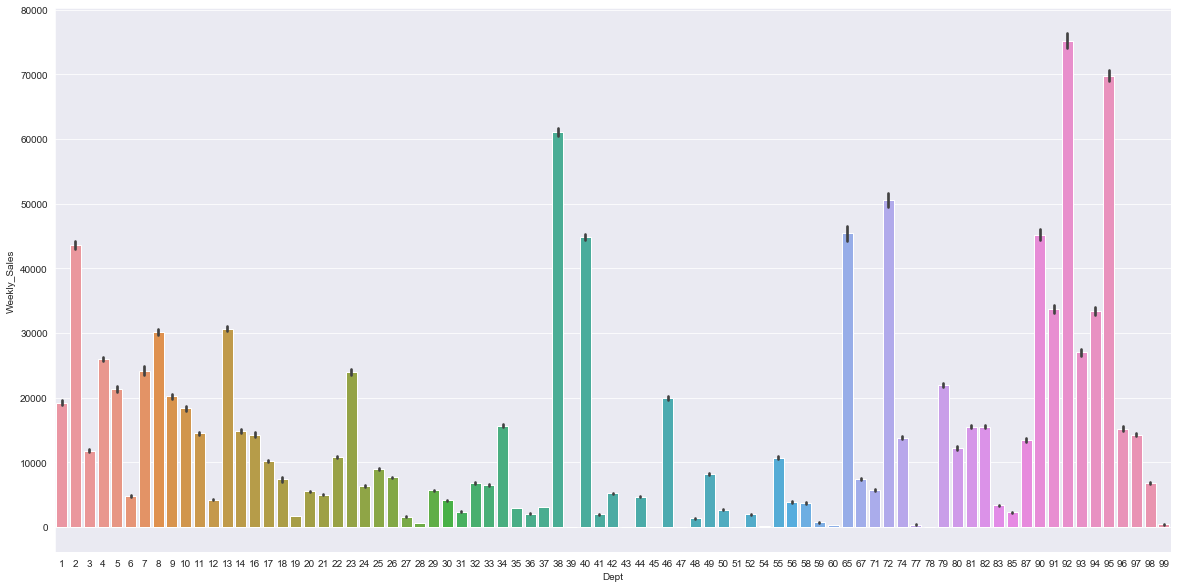

In [51]:
plt.figure(figsize = (20,10))
sns.barplot(data=df, x='Dept', y='Weekly_Sales')

In [52]:
df=pd.get_dummies(df, columns=["Type","IsHoliday"])

In [53]:
df.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
0,1,42.31,2.572,211.096358,8.106,151315,1,24924.50,1,0,0,1,0
1,1,42.31,2.572,211.096358,8.106,151315,2,50605.27,1,0,0,1,0
2,1,42.31,2.572,211.096358,8.106,151315,3,13740.12,1,0,0,1,0
3,1,42.31,2.572,211.096358,8.106,151315,4,39954.04,1,0,0,1,0
4,1,42.31,2.572,211.096358,8.106,151315,5,32229.38,1,0,0,1,0


In [54]:
x=df.drop(columns=['Weekly_Sales'])
x.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
0,1,42.31,2.572,211.096358,8.106,151315,1,1,0,0,1,0
1,1,42.31,2.572,211.096358,8.106,151315,2,1,0,0,1,0
2,1,42.31,2.572,211.096358,8.106,151315,3,1,0,0,1,0
3,1,42.31,2.572,211.096358,8.106,151315,4,1,0,0,1,0
4,1,42.31,2.572,211.096358,8.106,151315,5,1,0,0,1,0


In [55]:
y=df['Weekly_Sales']

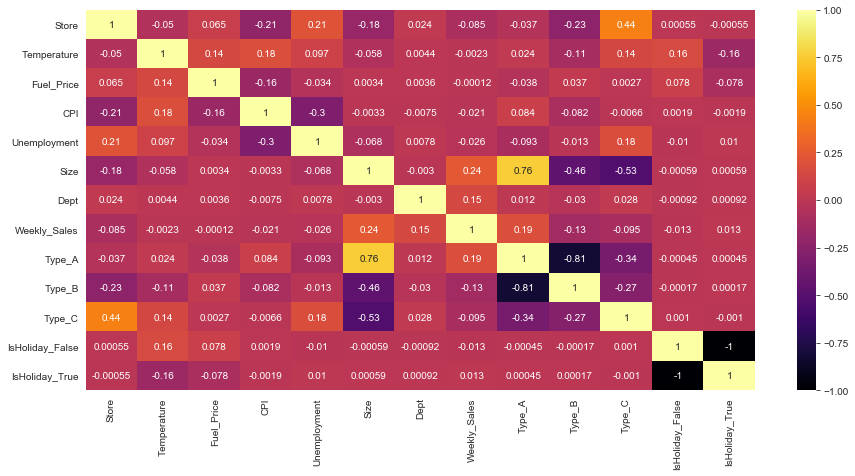

In [56]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),cmap="inferno",annot = True)

In [57]:
#Linear Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [58]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=9) #60% training, 40% testing

In [59]:
x.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
0,1,42.31,2.572,211.096358,8.106,151315,1,1,0,0,1,0
1,1,42.31,2.572,211.096358,8.106,151315,2,1,0,0,1,0
2,1,42.31,2.572,211.096358,8.106,151315,3,1,0,0,1,0
3,1,42.31,2.572,211.096358,8.106,151315,4,1,0,0,1,0
4,1,42.31,2.572,211.096358,8.106,151315,5,1,0,0,1,0


In [60]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [61]:
features = ['Store','Temperature','Fuel_Price','CPI','Unemployment','Size','Dept','Type_A','Type_B','Type_C','IsHoliday_False','IsHoliday_True']
x=pd.DataFrame(data = x, columns = features)
x.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
0,-1.658199,-0.963798,-1.720834,1.018774,0.078201,0.239209,-1.418742,0.977978,-0.795938,-0.335263,0.275106,-0.275106
1,-1.658199,-0.963798,-1.720834,1.018774,0.078201,0.239209,-1.385947,0.977978,-0.795938,-0.335263,0.275106,-0.275106
2,-1.658199,-0.963798,-1.720834,1.018774,0.078201,0.239209,-1.353151,0.977978,-0.795938,-0.335263,0.275106,-0.275106
3,-1.658199,-0.963798,-1.720834,1.018774,0.078201,0.239209,-1.320356,0.977978,-0.795938,-0.335263,0.275106,-0.275106
4,-1.658199,-0.963798,-1.720834,1.018774,0.078201,0.239209,-1.287560,0.977978,-0.795938,-0.335263,0.275106,-0.275106


In [62]:
#Creating the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print('intercept ', lr.intercept_)
print(pd.DataFrame({'Predictor': x.columns, 'coefficient': lr.coef_}))
print("\n*********************************************************\n")
regressionSummary(y_train, lr.predict(X_train))
y_pred = lr.predict(X_train)
print("*********************************************************\n")
print('adjusted r2 : ', adjusted_r2_score(y_train, y_pred, lr))
print('AIC : ', AIC_score(y_train, y_pred, lr))
print('BIC : ', BIC_score(y_train, y_pred, lr))

intercept  8628.667251375377
          Predictor  coefficient
0             Store  -139.901034
1       Temperature    16.203062
2        Fuel_Price  -243.550451
3               CPI   -25.782583
4      Unemployment  -244.221794
5              Size     0.099560
6              Dept   111.991113
7            Type_A -1852.147303
8            Type_B -2130.142656
9            Type_C  3982.289959
10  IsHoliday_False  -640.458816
11   IsHoliday_True   640.458816

*********************************************************


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 21599.5988
     Mean Absolute Error (MAE) : 14560.7965
*********************************************************

adjusted r2 :  0.09005891451215386
AIC :  5766786.160387058
BIC :  5766932.333203952


# Using unseen data

In [72]:
#Creating our own data from intuition
#Store Temperature Fuel_Price CPI Unemployment IsHoliday Type Size Dept
values_to_predict= np.array([
                            [20, 30, 3,210,8.2,'True','A', 210000,92],    # Case 1: Surely will have high weekly sales
                            [24, 18,4.25,160,13,'False', 'C', 35000,31],#Case 2: Surely will have low weekly sales
                            [19,21, 3.7, 200, 7,'False','B', 60000, 12]#Case 3: Random data
                        ])

print(values_to_predict, '\n\n')

[['20' '30' '3' '210' '8.2' 'True' 'A' '210000' '92']
 ['24' '18' '4.25' '160' '13' 'False' 'C' '35000' '31']
 ['19' '21' '3.7' '200' '7' 'False' 'B' '60000' '12']] 




In [73]:
features = ['Store','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday', 'Type','Size','Dept']
x_new=pd.DataFrame(data = values_to_predict, columns = features)
x_new.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Dept
0,20,30,3,210,8.2,True,A,210000,92
1,24,18,4.25,160,13,False,C,35000,31
2,19,21,3.7,200,7,False,B,60000,12


In [74]:
#Assigning dummy values to categorical data
df_new=pd.get_dummies(x_new, columns=["Type","IsHoliday"])
df_new

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
0,20,30,3,210,8.2,210000,92,1,0,0,0,1
1,24,18,4.25,160,13,35000,31,0,0,1,1,0
2,19,21,3.7,200,7,60000,12,0,1,0,1,0


In [75]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
df_new = StandardScaler().fit_transform(df_new)

In [76]:
df_new

array([[-0.46291005,  1.37281295, -1.27068866,  0.9258201 , -0.46291005,
         1.40182605,  1.37720007,  1.41421356, -0.70710678, -0.70710678,
        -1.41421356,  1.41421356],
       [ 1.38873015, -0.98058068,  1.17294338, -1.38873015,  1.38873015,
        -0.86266219, -0.41022981, -0.70710678, -0.70710678,  1.41421356,
         0.70710678, -0.70710678],
       [-0.9258201 , -0.39223227,  0.09774528,  0.46291005, -0.9258201 ,
        -0.53916387, -0.96697026, -0.70710678,  1.41421356, -0.70710678,
         0.70710678, -0.70710678]])

In [77]:
features = ['Store','Temperature','Fuel_Price','CPI','Unemployment','Size','Dept','Type_A','Type_B','Type_C','IsHoliday_False','IsHoliday_True']
df_new=pd.DataFrame(data = df_new, columns = features)
df_new

,Store,Temperature,Fuel_Price,CPI,Unemployment,Size,Dept,Type_A,Type_B,Type_C,IsHoliday_False,IsHoliday_True
0,-0.46291,1.372813,-1.270689,0.92582,-0.46291,1.401826,1.37720,1.414214,-0.707107,-0.707107,-1.414214,1.414214
1,1.38873,-0.980581,1.172943,-1.38873,1.38873,-0.862662,-0.41023,-0.707107,-0.707107,1.414214,0.707107,-0.707107
2,-0.92582,-0.392232,0.097745,0.46291,-0.92582,-0.539164,-0.96697,-0.707107,1.414214,-0.707107,0.707107,-0.707107


In [78]:
lr.predict(df_new) #It did not make accurate predictions. The values are not consistent. The adjusted R squared value which we obtained is very low. The model is not a good one

array([ 7151.19917375, 15325.40923057,  3409.39334981])